<a href="https://colab.research.google.com/github/soumyakrath/IMTPDS2021/blob/main/GitHub-pwd/mammals_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering Analysis in R using K-means**

##### The purpose of clustering analysis is to identify patterns in the data and create groups according to those patterns. Therefore, if two points have similar characteristics, that means they have the same pattern and consequently, they belong to the same group. By doing clustering analysis we should be able to check what features usually appear together and see what characterizes a group.
The purpose is to perform a clustering analysis with multiple variables using the algorithm K-means.

### The intention is to find groups of mammals based on the composition of the species’ milk

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()



In [ ]:
install.packages("cluster")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("cluster.datasets")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(cluster.datasets)

##### **Describing the data**
The dataset used is part of the package cluster.datasets and contains 25 observations on the following 6 variables:

name — a character vector for the name of the animals

water — a numeric vector for the water content in the milk sample

protein — a numeric vector for the amount of protein in the milk sample

fat — a numeric vector for the fat content in the milk sample

lactose — a numeric vector for the amount of lactose in the milk sample

ash — a numeric vector for the amount of mineral in the milk sample

In [ ]:
data(all.mammals.milk.1956)

In [ ]:
dim(all.mammals.milk.1956)

[1] 25  6

In [ ]:
head(all.mammals.milk.1956)

,name,water,protein,fat,lactose,ash
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Horse,90.1,2.6,1.0,6.9,0.35
2,Orangutan,88.5,1.4,3.5,6.0,0.24
3,Monkey,88.4,2.2,2.7,6.4,0.18
4,Donkey,90.3,1.7,1.4,6.2,0.40
5,Hippo,90.4,0.6,4.5,4.4,0.10
6,Camel,87.7,3.5,3.4,4.8,0.71


In [ ]:
install.packages("gridExtra")
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



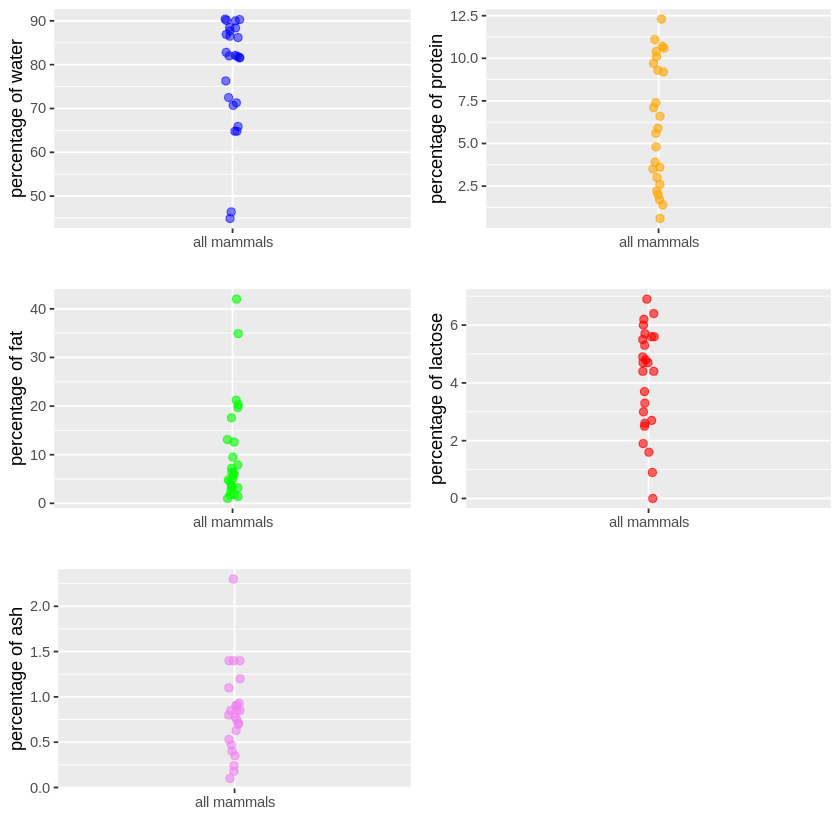

In [ ]:
plot1 <- all.mammals.milk.1956 %>% 
    ggplot(aes(x = "all mammals", y = water)) + 
    geom_jitter(width = .025, height = 0, size = 2, alpha = .5, color = "blue") +
  labs(x = "", y="percentage of water")
  
plot2 <-  all.mammals.milk.1956 %>%
  ggplot(aes(x = "all mammals", y = protein)) + 
    geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "orange") +
  labs(x = "", y="percentage of protein")
  
plot3 <-  all.mammals.milk.1956 %>%
  ggplot(aes(x = "all mammals", y = fat)) + 
    geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "green") +
  labs(x = "", y="percentage of fat")
  
plot4 <-  all.mammals.milk.1956 %>%
  ggplot(aes(x = "all mammals", y = lactose)) + 
    geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "red") +
  labs(x = "", y="percentage of lactose")
  
plot5 <-  all.mammals.milk.1956 %>%
  ggplot(aes(x = "all mammals", y = ash)) + 
    geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "violet") +
  labs(x = "", y="percentage of ash")
  
grid.arrange(plot1, plot2, plot3, plot4, plot5)

In [ ]:
str(all.mammals.milk.1956)

'data.frame':	25 obs. of  6 variables:
 $ name   : chr  "Horse" "Orangutan" "Monkey" "Donkey" ...
 $ water  : num  90.1 88.5 88.4 90.3 90.4 87.7 86.9 82.1 81.9 81.6 ...
 $ protein: num  2.6 1.4 2.2 1.7 0.6 3.5 4.8 5.9 7.4 10.1 ...
 $ fat    : num  1 3.5 2.7 1.4 4.5 3.4 1.7 7.9 7.2 6.3 ...
 $ lactose: num  6.9 6 6.4 6.2 4.4 4.8 5.7 4.7 2.7 4.4 ...
 $ ash    : num  0.35 0.24 0.18 0.4 0.1 0.71 0.9 0.78 0.85 0.75 ...


In [ ]:
summary(all.mammals.milk.1956)

     name               water          protein            fat       
 Length:25          Min.   :44.90   Min.   : 0.600   Min.   : 1.00  
 Class :character   1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40  
 Mode  :character   Median :82.00   Median : 5.900   Median : 6.30  
                    Mean   :78.18   Mean   : 6.212   Mean   :10.31  
                    3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10  
                    Max.   :90.40   Max.   :12.300   Max.   :42.00  
    lactose           ash        
 Min.   :0.000   Min.   :0.1000  
 1st Qu.:2.700   1st Qu.:0.5300  
 Median :4.700   Median :0.8000  
 Mean   :4.132   Mean   :0.8292  
 3rd Qu.:5.600   3rd Qu.:0.9300  
 Max.   :6.900   Max.   :2.3000  

In [ ]:
# making "name" as index to the dataset
rownames(all.mammals.milk.1956) <- all.mammals.milk.1956$name

In [ ]:
mammals <- subset(all.mammals.milk.1956, select = -c(1) )
dim(mammals)

[1] 25  5

In [ ]:
head(mammals)

,water,protein,fat,lactose,ash
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Horse,90.1,2.6,1.0,6.9,0.35
Orangutan,88.5,1.4,3.5,6.0,0.24
Monkey,88.4,2.2,2.7,6.4,0.18
Donkey,90.3,1.7,1.4,6.2,0.40
Hippo,90.4,0.6,4.5,4.4,0.10
Camel,87.7,3.5,3.4,4.8,0.71


In [ ]:
df <- scale(mammals)
head(df)

,water,protein,fat,lactose,ash
Horse,0.9296365,-0.9888990,-0.8849593,1.5110575,-1.0114245
Orangutan,0.8048112,-1.3174368,-0.6472715,1.0197455,-1.2435962
Monkey,0.7970096,-1.0984116,-0.7233316,1.2381064,-1.3702353
Donkey,0.9452397,-1.2353024,-0.8469293,1.1289259,-0.9058919
Hippo,0.9530412,-1.5364621,-0.5521964,0.1463018,-1.5390875
Camel,0.7423985,-0.7424956,-0.6567790,0.3646627,-0.2515897


In [ ]:
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘matrixStats’, ‘caret’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




In [ ]:
library("factoextra")
res <- get_clust_tendency(df, 10, graph = TRUE)
# Hopskin statistic
res$hopkins_stat

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



[1] 0.7462035

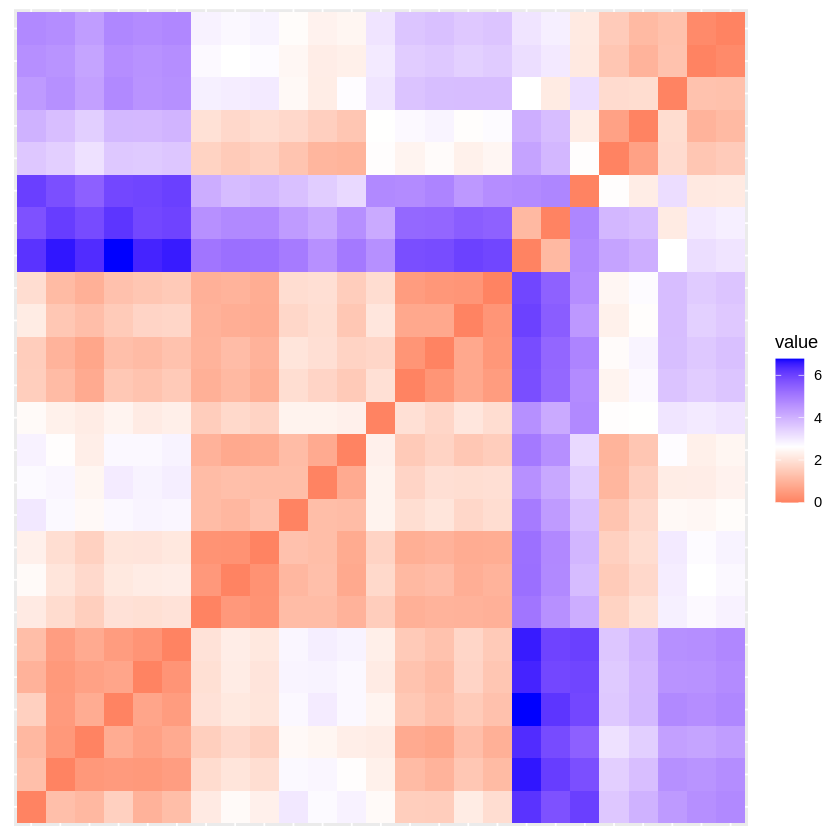

In [ ]:
print(res$plot)

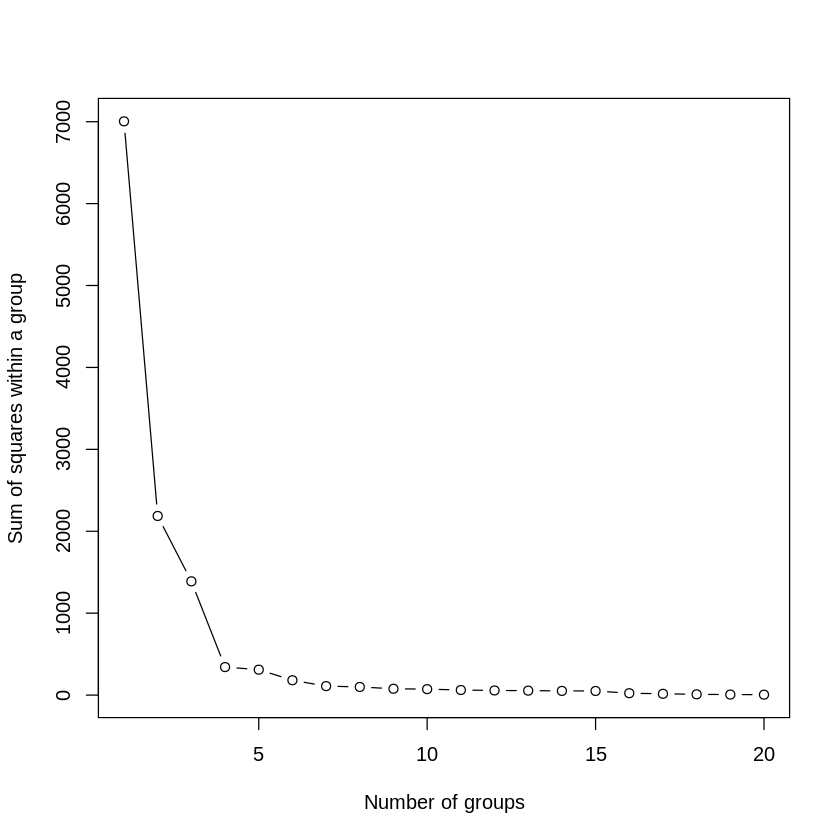

In [ ]:
wssplot <- function(data, nc=15, seed=123){
               wss <- (nrow(data)-1)*sum(apply(data,2,var))
               for (i in 2:nc){
                    set.seed(seed)
                    wss[i] <- sum(kmeans(data, centers=i)$withinss)}
                plot(1:nc, wss, type="b", xlab="Number of groups",
                     ylab="Sum of squares within a group")}

wssplot(mammals, nc = 20)

The function above plots a chart showing the “within sum of squares” (withinss) by the number of groups (K value) chosen for several executions of the algorithm. The within sum of squares is a metric that shows how dissimilar are the members of a group. The greater is the sum, the greater is the dissimilarity within a group.

By Analysing the chart from right to left, we can see that when the number of groups (K) reduces from 4 to 3 there is a big increase in the sum of squares, bigger than any other previous increase. That means that when it passes from 4 to 3 groups there is a reduction in the clustering compactness (by compactness, I mean the similarity within a group)

Let’s choose K = 4 and run the K-means

In [ ]:
# Compute k-means
set.seed(123)
km.res <- kmeans(df, 4, nstart = 20)
head(km.res$cluster, 25)

Horse  Orangutan     Monkey     Donkey      Hippo      Camel      Bison 
         4          4          4          4          4          1          1 
   Buffalo Guinea Pig        Cat        Fox      Llama       Mule        Pig 
         1          1          1          1          1          4          1 
     Zebra      Sheep        Dog   Elephant     Rabbit        Rat       Deer 
         1          1          3          1          3          3          3 
  Reindeer      Whale       Seal    Dolphin 
         3          3          2          2

In [ ]:
km.res

K-means clustering with 4 clusters of sizes 11, 2, 6, 6

Cluster means:
       water    protein        fat    lactose        ash
1  0.3544471 -0.1700432 -0.3793325  0.3299235 -0.0117429
2 -2.5381667  1.0781517  2.6756044 -2.0100122 -0.2938028
3 -0.6956931  1.1739753  0.5475060 -0.9000109  1.2575265
4  0.8919289 -1.2216133 -0.7439312  0.9651552 -1.1380636

Clustering vector:
     Horse  Orangutan     Monkey     Donkey      Hippo      Camel      Bison 
         4          4          4          4          4          1          1 
   Buffalo Guinea Pig        Cat        Fox      Llama       Mule        Pig 
         1          1          1          1          1          4          1 
     Zebra      Sheep        Dog   Elephant     Rabbit        Rat       Deer 
         1          1          3          1          3          3          3 
  Reindeer      Whale       Seal    Dolphin 
         3          3          2          2 

Within cluster sum of squares by cluster:
[1] 9.5048692 0.613821

The kmeans() function outputs the results of the clustering. We can see the centroid vectors (cluster means), the group in which each observation was allocated (clustering vector) and a percentage (83.3%) that represents the compactness of the clustering, that is, how similar are the members within the same group. If all the observations within a group were in the same exact point in the n-dimensional space, then we would achieve 100% of compactness.

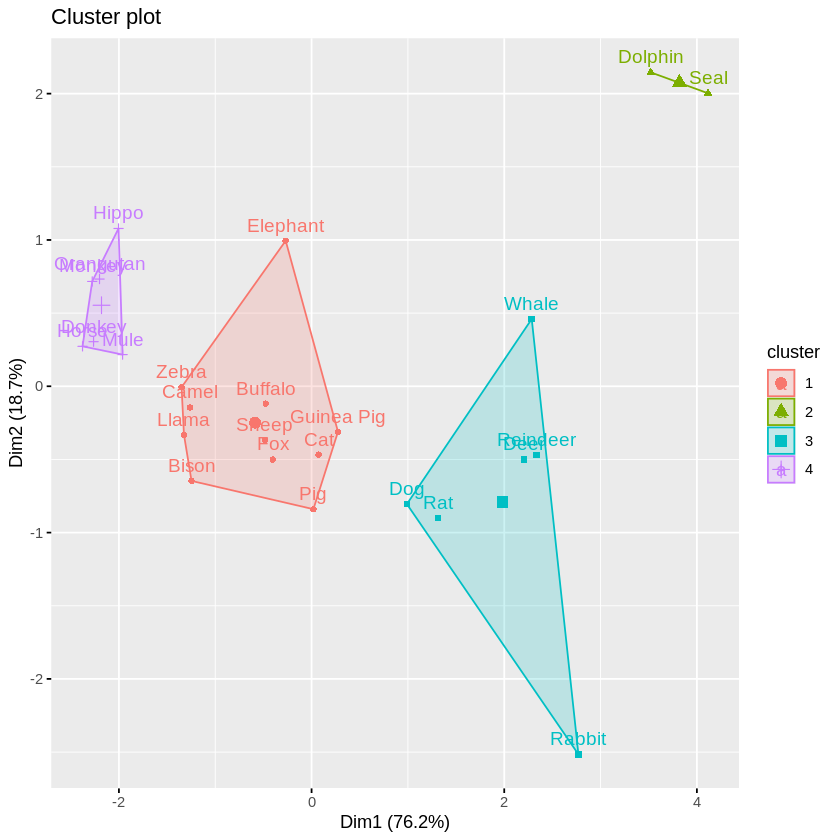

In [ ]:
# Visualize clusters using factoextra
fviz_cluster(km.res, mammals)

In [ ]:
sil <- silhouette(km.res$cluster, dist(df))
rownames(sil) <- rownames(mammals)
head(sil[, 1:3])

,cluster,neighbor,sil_width
Horse,4,1,0.5991022
Orangutan,4,1,0.6995689
Monkey,4,1,0.6765243
Donkey,4,1,0.6734214
Hippo,4,1,0.4680547
Camel,1,4,0.1023736


In [ ]:
sil

           cluster neighbor   sil_width
Horse            4        1  0.59910218
Orangutan        4        1  0.69956895
Monkey           4        1  0.67652429
Donkey           4        1  0.67342143
Hippo            4        1  0.46805467
Camel            1        4  0.10237363
Bison            1        4  0.28020805
Buffalo          1        4  0.50961964
Guinea Pig       1        3  0.28422459
Cat              1        3  0.33645501
Fox              1        4  0.54774142
Llama            1        4  0.16528920
Mule             4        1  0.54134057
Pig              1        3  0.40653094
Zebra            1        4 -0.03917351
Sheep            1        4  0.54344773
Dog              3        1  0.14249771
Elephant         1        4  0.14951083
Rabbit           3        1  0.40741073
Rat              3        1  0.36968234
Deer             3        1  0.59143774
Reindeer         3        2  0.58818087
Whale            3        2  0.20673246
Seal             2        3  0.69749945


The silhouette plot below gives us evidence that our clustering using four groups is good except one negative silhouette width (Zebra) and most of the values are bigger than 0.5.

  cluster size ave.sil.width
1       1   11          0.30
2       2    2          0.69
3       3    6          0.38
4       4    6          0.61


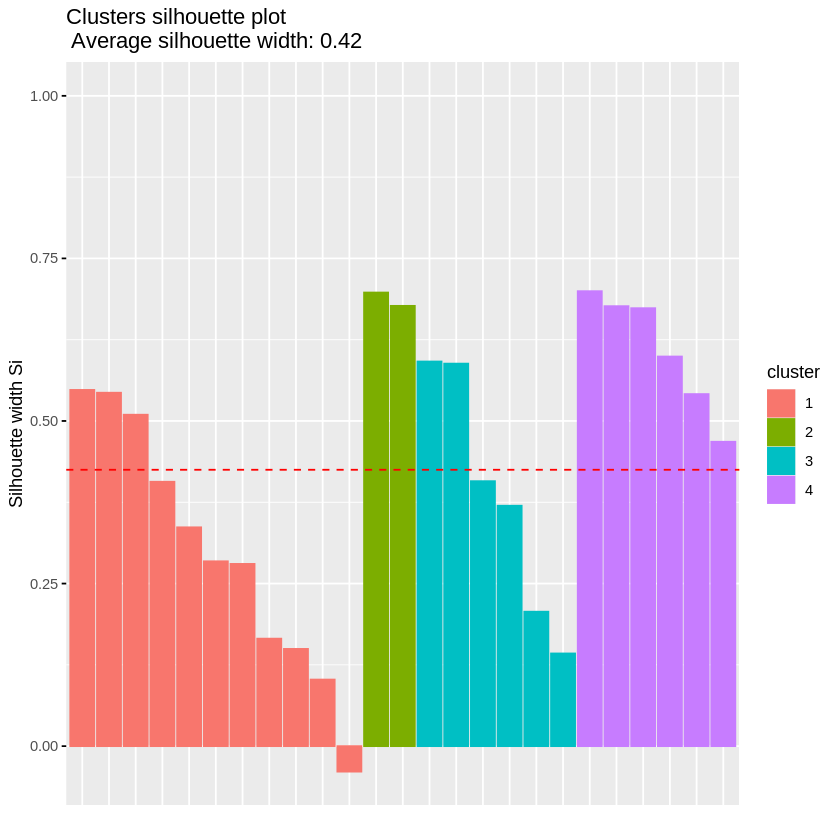

In [ ]:
fviz_silhouette(sil)

In [ ]:
neg_sil_index <- which(sil[, "sil_width"] < 0)
sil[neg_sil_index, , drop = FALSE]

,cluster,neighbor,sil_width
Zebra,1,4,-0.03917351


## K-means clustering using eclust() : Enhanced clustering analysis

We will verify our above result of choosing K=4 by using Enhanced clustering analysis

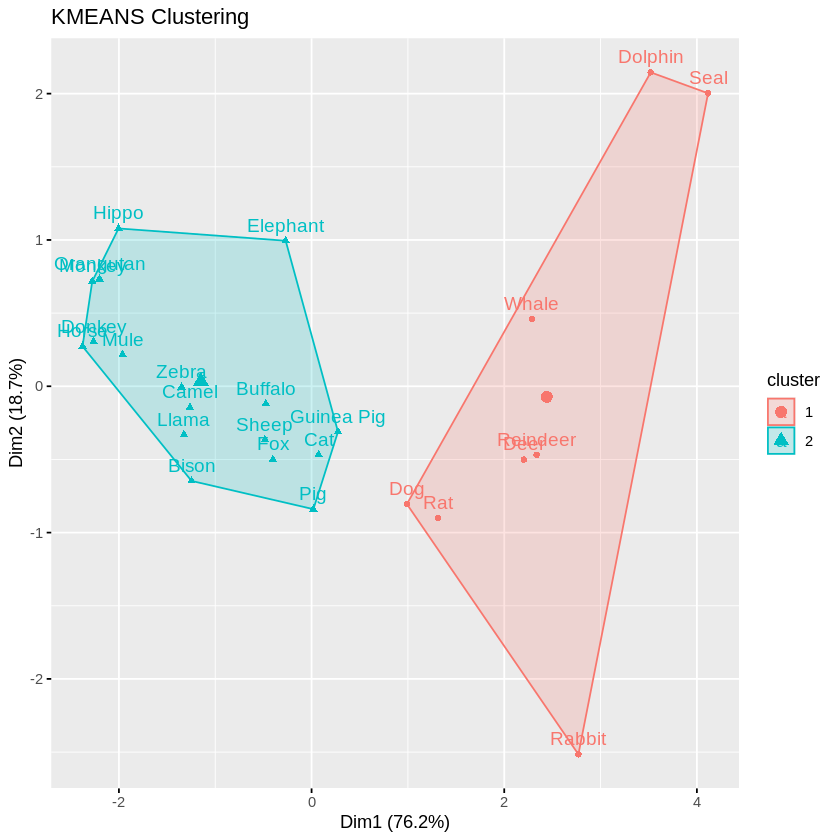

In [ ]:
# Compute k-means
res.km <- eclust(df, "kmeans", nstart = 20)

Here it is splitting into 2 groups

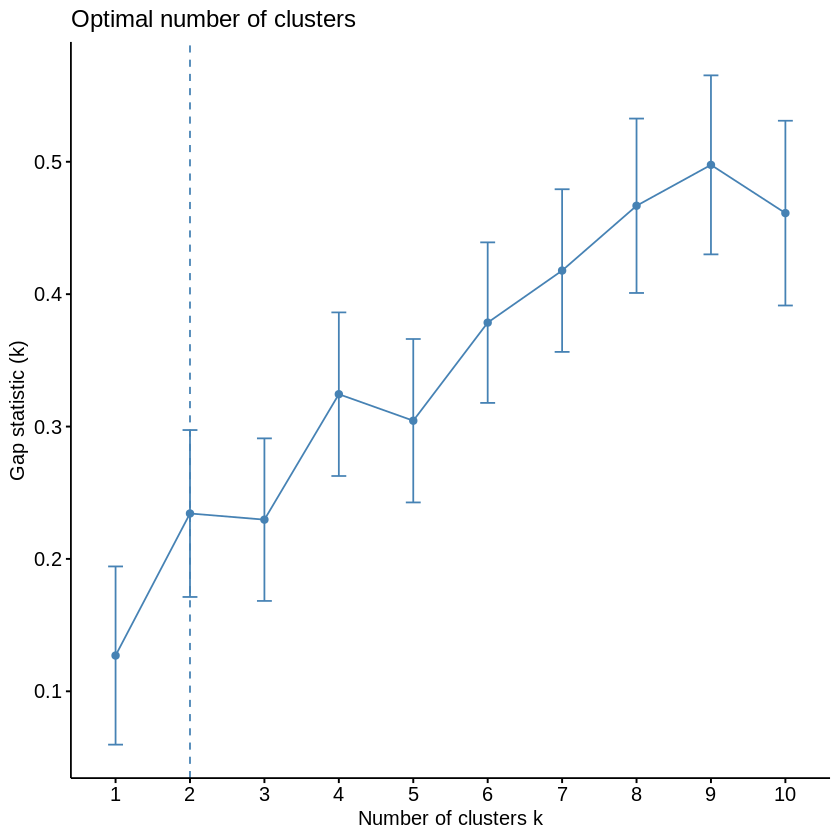

In [ ]:
# Gap statistic plot
fviz_gap_stat(res.km$gap_stat)

  cluster size ave.sil.width
1       1    8          0.37
2       2   17          0.58


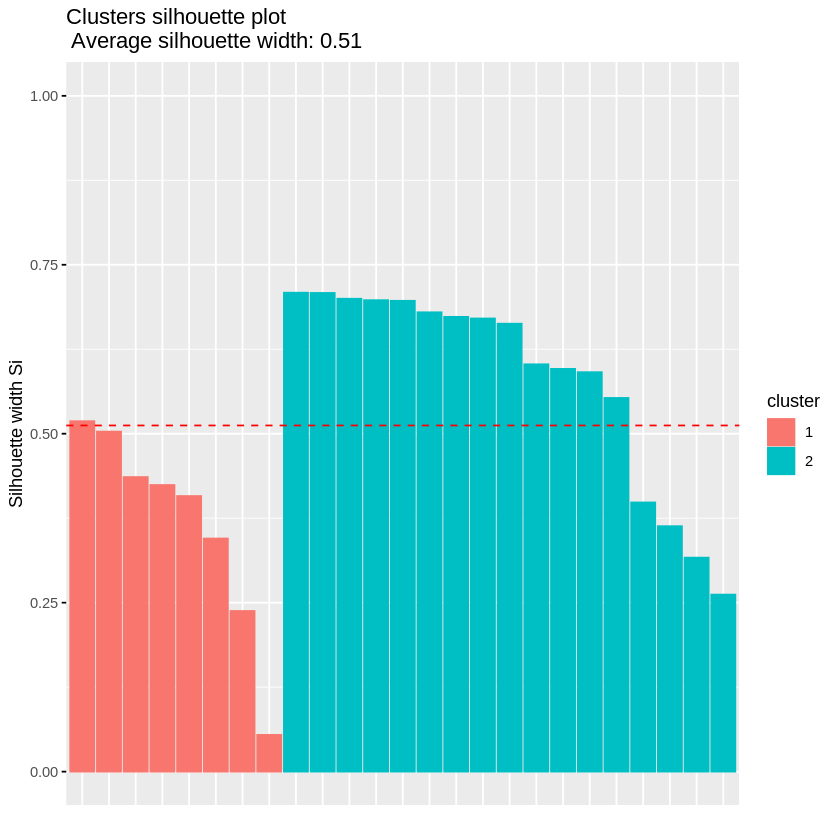

In [ ]:
# Silhouette plot
fviz_silhouette(res.km)

## Hierachical clustering using eclust()

In [ ]:
# Enhanced hierarchical clustering
 # compute hclust
res.hc <- eclust(df, "hclust")

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


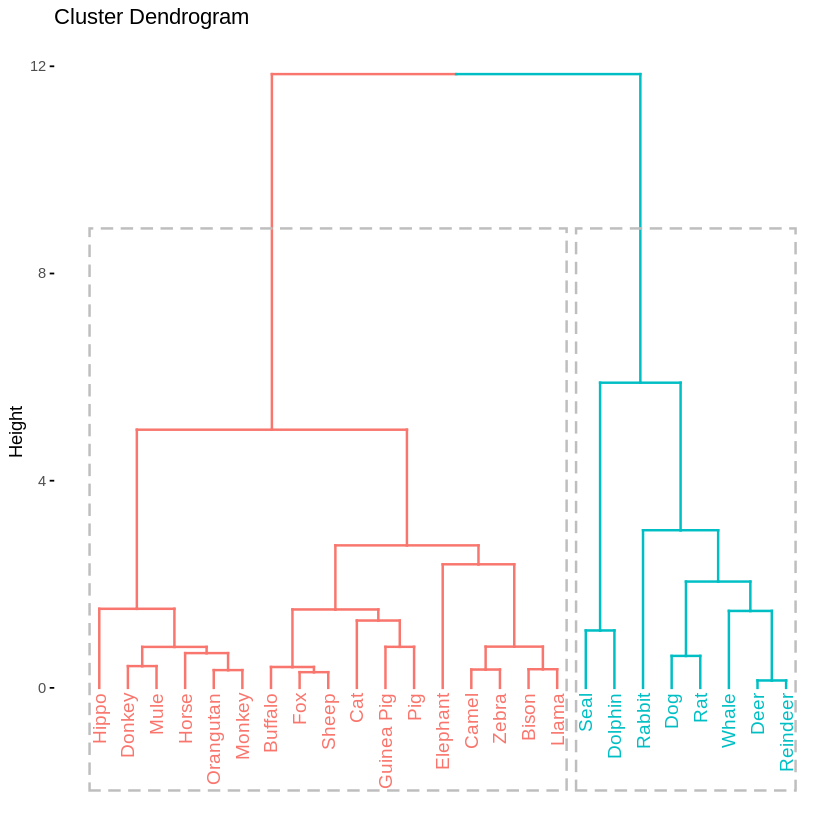

In [ ]:
# dendrogram
fviz_dend(res.hc, rect = TRUE) 

In [ ]:
mammals

,water,protein,fat,lactose,ash,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Horse,90.1,2.6,1.0,6.9,0.35,2
Orangutan,88.5,1.4,3.5,6.0,0.24,2
Monkey,88.4,2.2,2.7,6.4,0.18,2
Donkey,90.3,1.7,1.4,6.2,0.40,2
Hippo,90.4,0.6,4.5,4.4,0.10,2
Camel,87.7,3.5,3.4,4.8,0.71,2
Bison,86.9,4.8,1.7,5.7,0.90,2
Buffalo,82.1,5.9,7.9,4.7,0.78,2
Guinea Pig,81.9,7.4,7.2,2.7,0.85,2


Let’s take the green group as an instance to evaluate. The two mammal species that belong to that group, namely seal and dolphin, they have the lowest percentage of water (44.9% and 46.4%); they both have around 10% of protein in their milk; they have the highest percentage of fat in the milk among all other species as well as the lowest percentage of lactose. This is the pattern found that puts seals and dolphins together in the same group. We can identify such patterns in the other groups as well.